In [87]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import statsmodels.api as sm
import scipy.stats as st

from matplotlib import rcParams

In [88]:
data = pd.read_csv('../src/data/marketing_campaign_cleaned.csv', index_col=[0])
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,1,83894400000000000,64,1617,Alone,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,10800000000000000,67,27,Alone,2,3,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,40780800000000000,56,776,Partner,0,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,5616000000000000,37,53,Partner,1,3,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,27734400000000000,40,422,Partner,1,3,1


- Density distribution of Age, Income, Spent

In [89]:
category = pd.cut(data.Age,bins=[25,40,65,81],labels=['Adults','Seniors', 'Elderly'])
data.insert(2,'Age_Groups',category)

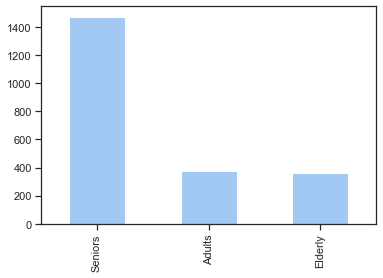

In [90]:
data['Age_Groups'].value_counts().plot(kind='bar');

In [91]:
age_spent = data.groupby(['Age_Groups']).agg({'Spent': ['mean', 'count']})
age_spent

Spent      
                  mean count
Age_Groups                  
Adults      582.455026   378
Seniors     580.728076  1471
Elderly     744.376731   361

In [92]:
#sns.regplot(data = data, x = "Education", y = "Income", lowess=False).set(title='Education ~ Income');

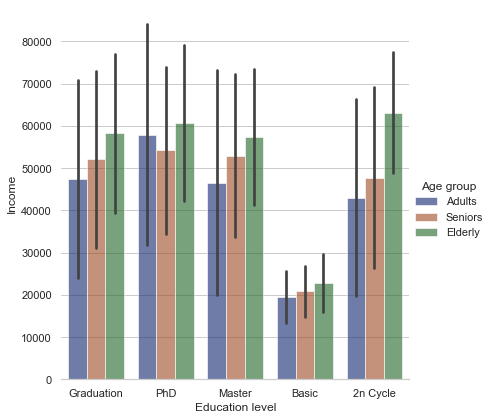

In [93]:
import seaborn as sns
sns.set_theme(style="whitegrid")



# Draw a nested barplot by Education and Age groups
g = sns.catplot(
    data=data, kind="bar",
    x="Education", y="Income", hue="Age_Groups",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Education level", "Income")
g.legend.set_title("Age group")

In [94]:
import seaborn as sb

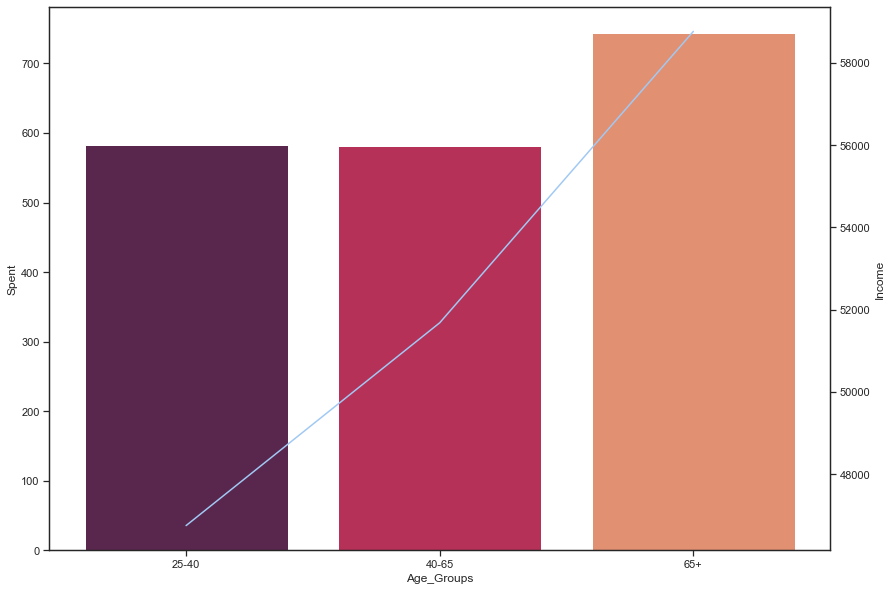

In [119]:
fig, ax1 = plt.subplots(figsize=(14, 10))
sb.barplot(data = data, x = 'Age_Groups', y = 'Spent', ci = None,
                      ax = ax1, palette = 'rocket');

ax2 = ax1.twinx()
ax = sb.lineplot(data = data, x = 'Age_Groups', y = 'Income', ax = ax2, ci = None);
plt.xticks([0, 1, 2], ['25-40', '40-65', '65+'])
plt.show()

In [151]:
mean_spent = data.groupby(['Age_Groups']).Spent.mean().reset_index()
fig = px.bar(mean_spent, x='Age_Groups', y='Spent', color='Age_Groups')
fig.update_layout(
  xaxis=dict(
    title={'text': ''},
    tickvals=[0, 1, 2],
    ticktext=['25-40', '40-65', '65+']
  ),
  yaxis={'title': {'text': 'Mean spendings'}}
)

In [122]:
spend_5_500 = data["Spent"][(data["Spent"] >=5) & (data["Spent"] <= 500)]
spend_501_1000 = data["Spent"][(data["Spent"] >=501) & (data["Spent"] <= 1000)]
spend_1001_1500 = data["Spent"][(data["Spent"] >=1001) & (data["Spent"] <= 1500)]
spend_1501_2000 = data["Spent"][(data["Spent"] >=1501) & (data["Spent"] <= 2000 )]
spend_2001_2525 = data["Spent"][(data["Spent"] >=2001) & (data["Spent"] <= 2525)]

spend_x = ['5-500', '501-1000', '1001-1500', '1501-2000', '2001-2525']
spend_y = [len(spend_5_500.values), len(spend_501_1000.values), len(spend_1001_1500.values), len(spend_1501_2000.values), len(spend_2001_2525.values)]

d = {'spent_group': spend_x, 'count': spend_y}
spent_df = pd.DataFrame(d)
spent_df.head()

,spent_group,count
0,5-500,1228
1,501-1000,387
2,1001-1500,355
3,1501-2000,192
4,2001-2525,50


In [98]:
import plotly.express as px
px.bar(spent_df, x='spent_group', y='count', color='spent_group')

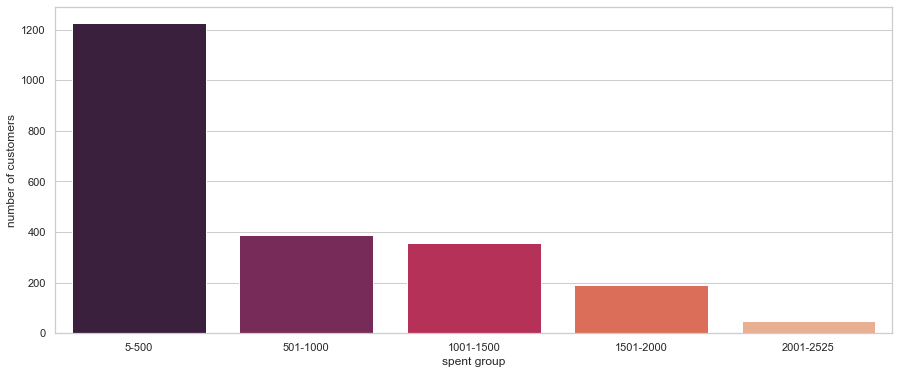

In [99]:
plt.figure(figsize=(15,6))
sns.barplot(x=spend_x, y=spend_y, palette="rocket")
plt.xlabel('spent group')
plt.ylabel('number of customers')
plt.show()

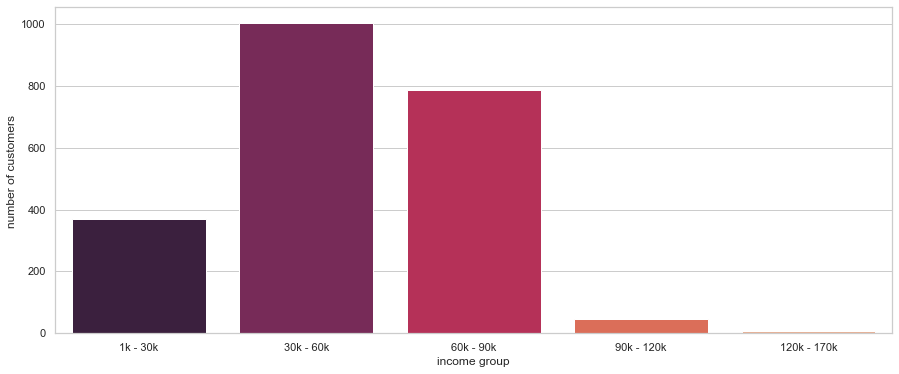

In [100]:
income_1_30k = data["Income"][(data["Income"] >=1000) & (data["Income"] <= 30000)]
income_30_60k = data["Income"][(data["Income"] >=30001) & (data["Income"] <= 60000)]
income_60_90k = data["Income"][(data["Income"] >=60001) & (data["Income"] <= 90000)]
income_90_120k = data["Income"][(data["Income"] >=90001) & (data["Income"] <= 120000 )]
income_120_170k = data["Income"][(data["Income"] >=120001) & (data["Income"] <= 170000)]

income_x = ['1k - 30k', '30k - 60k', '60k - 90k', '90k - 120k', '120k - 170k']
income_y = [len(income_1_30k.values), len(income_30_60k.values), len(income_60_90k.values), len(income_90_120k.values), len(income_120_170k.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="rocket")
plt.xlabel('income group')
plt.ylabel('number of customers ')
plt.show()

In [101]:
y = data['Spent']
X = sm.add_constant(data['Age'])

linear_age_spent = sm.OLS(y, X).fit()

print("Coefficients", linear_age_spent.params, sep = "\n")

Coefficients
const    296.431621
Age        5.967715
dtype: float64


In [102]:
linear_age_spent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Spent   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     30.09
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           4.59e-08
Time:                        11:50:21   Log-Likelihood:                -17282.
No. Observations:                2212   AIC:                         3.457e+04
Df Residuals:                    2210   BIC:                         3.458e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        296.4316     58.076      5.104      0.000     182.542     410.322
Age            5.9677      1.088      5.486      0.000       3.834       8.101
==============================================================================
Omnibus:                      228.748   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.955
Skew:                           0.897   Prob(JB):                     4.45e-66
Kurtosis:                       2.781   Cond. No.                         244.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
linear_age_spent.pvalues

const    3.606366e-07
Age      4.593023e-08
dtype: float64

In [104]:
y = data['Spent']
X = sm.add_constant(data['Income'])

linear_1 = sm.OLS(y, X).fit()

print("Coefficients", linear_1.params, sep = "\n")

Coefficients
const    -545.567559
Income      0.022187
dtype: float64


In [105]:
linear_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Spent   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     3738.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:50:21   Log-Likelihood:                -16202.
No. Observations:                2212   AIC:                         3.241e+04
Df Residuals:                    2210   BIC:                         3.242e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -545.5676     20.410    -26.730      0.000    -585.592    -505.543
Income         0.0222      0.000     61.138      0.000       0.021       0.023
==============================================================================
Omnibus:                      393.521   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5520.844
Skew:                          -0.398   Prob(JB):                         0.00
Kurtosis:                      10.698   Cond. No.                     1.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
linear_1.pvalues

const     1.256385e-136
Income     0.000000e+00
dtype: float64

In [107]:
place = data.filter(["Income", "NumStorePurchases", "NumWebPurchases", "NumCatalogPurchases"], axis=1)
place 

,Income,NumStorePurchases,NumWebPurchases,NumCatalogPurchases
0,58138.0,4,8,10
1,46344.0,2,1,1
2,71613.0,10,8,2
3,26646.0,4,2,0
4,58293.0,6,5,3
...,...,...,...,...
2235,61223.0,4,9,3
2236,64014.0,5,8,2
2237,56981.0,13,2,3
2238,69245.0,10,6,5


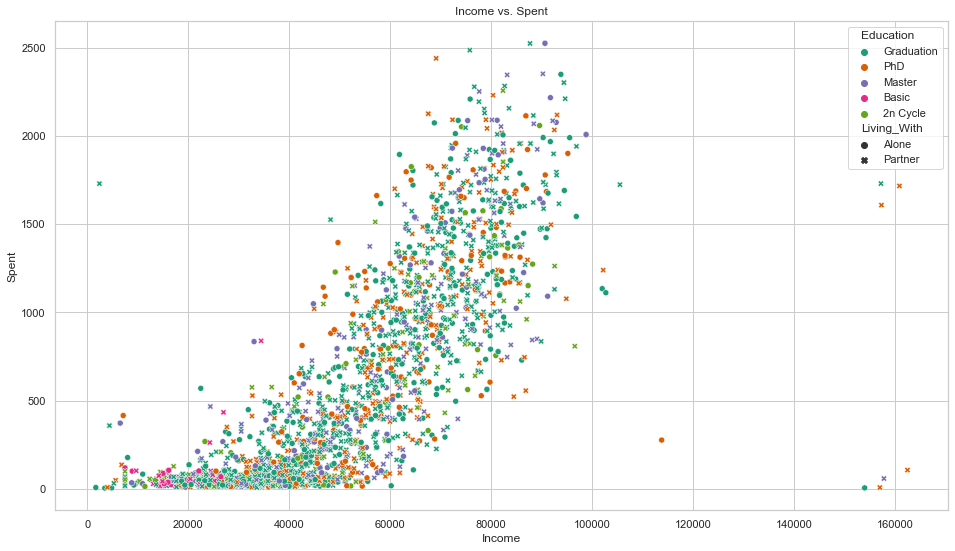

In [108]:
plt.figure(figsize= (16,9))
ax = sns.scatterplot(x=data['Income'], y=data['Spent'], style=data['Living_With'], hue=data['Education'], palette ='Dark2');

ax.set_title("Income vs. Spent");
plt.xlabel("Income");
plt.ylabel("Spent");

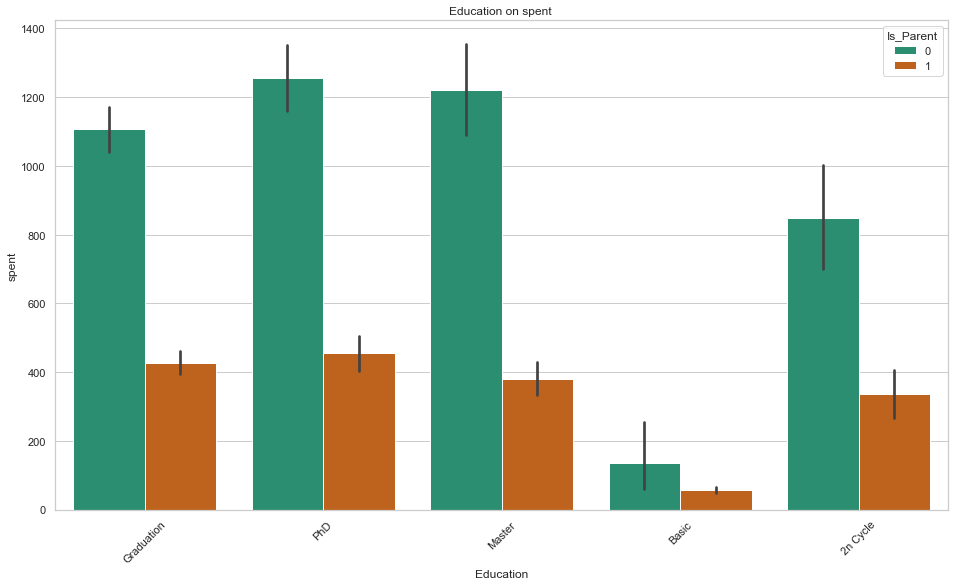

In [109]:
#x=penicillin_gram['penicillin_gram.index']
plt.figure(figsize=(16,9))
ax = sns.barplot(x = data['Education'] , y=data['Spent'], hue=data['Is_Parent'], palette ='Dark2');

#ax.set_yscale('log')
ax.set_title("Education on spent ");
plt.ylabel("spent");
plt.xticks(rotation = 45);

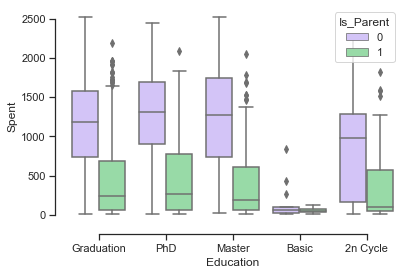

In [110]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")



# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Education", y="Spent",
            hue="Is_Parent", palette=["m", "g"],
            data=data)
sns.despine(offset=10, trim=True)

In [111]:
Living_With_spent = data.groupby(['Living_With']).agg({'Spent': ['mean', 'count']})
Living_With_spent

Spent      
                   mean count
Living_With                  
Alone        624.283163   784
Partner      597.926471  1428

In [112]:
X = data['Spent']
y = data['Is_Parent']
market_model_LI = sm.GLM(
    y,
    sm.add_constant(X),
    family=sm.families.Binomial(
        link=sm.genmod.families.links.logit()
        )
    ).fit()

print(market_model_LI.summary())
print("AIC:", market_model_LI.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Is_Parent   No. Observations:                 2212
Model:                            GLM   Df Residuals:                     2210
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1020.8
Date:                Fri, 03 Dec 2021   Deviance:                       2041.6
Time:                        11:50:22   Pearson chi2:                 2.28e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2394
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4229      0.095     25.420      0.0

In [113]:
market_model_LI.params

const    2.422947
Spent   -0.002087
dtype: float64

In [114]:
intercept, Spent = market_model_LI.params
odds = np.exp(intercept + (Spent * 100))

print(f"Estimated familiy status for buying 100 items : ", odds)

Estimated familiy status for buying 100 items :  9.154411955879954


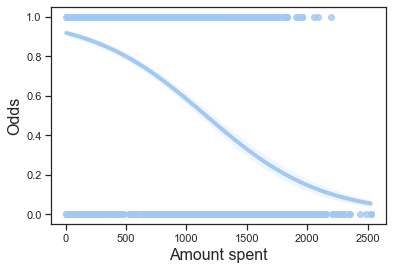

In [115]:
ax = sns.regplot(data = data, x = 'Spent', y= 'Is_Parent', logistic=True, ci=95, line_kws={'linewidth': 4})
ax.set_ylabel('Odds', fontsize=16)
ax.set_xlabel('Amount spent', fontsize=16);
    

###### 

In [116]:
import plotly.graph_objects as go

top_labels = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet','Gold']

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)', 'rgba(190, 163, 120, 0.85)']

x_data = [[44.9,  4.9,  32.1,  7,  4.8,  7.3],
          [50.9,  4.4,  26.8,  6.1,  4.5,  7.3],
          [53.6,  3.5,  26.0,  5.9,  4.1,  6.9]]

y_data = ['Adults', 'Seniors','Elderly']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()


In [117]:
import plotly.graph_objects as go

top_labels = ['Deals', 'Store', 'Website', 'Catalog']

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)', 'rgba(190, 163, 120, 0.85)']

x_data = [[13.6,  41.1,  26.3,  18.9],
          [16.7,  38.6,  27.6,  17.1],
          [13.4,  38.6,  27.8,  20.2]]

y_data = ['Adults', 'Seniors','Elderly']

fig = go.Figure()

for i in range(len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()
